In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from tqdm.autonotebook import tqdm

In [2]:
df = pd.read_csv('product.csv', sep=',')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8471220 entries, 0 to 8471219
Data columns (total 8 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   order_id      object
 1   user_id       object
 2   page_id       object
 3   product       object
 4   site_version  object
 5   time          object
 6   title         object
 7   target        int64 
dtypes: int64(1), object(7)
memory usage: 517.0+ MB


In [17]:
df.loc[df.title == 'order']

,order_id,user_id,page_id,product,site_version,time,title,target
60,072b030ba126b2f4b2374f342be9ed44,3c59dc048e8850243be8079a5c74d079,a3d2de7675556553a5f08e4c88d2c228,sports_nutrition,desktop,2019-03-03 10:15:41,order,1
106,f0935e4cd5920aa6c7c996a5ee53a70f,1c383cd30b7c298ab50293adfecb7b18,a3d2de7675556553a5f08e4c88d2c228,sneakers,desktop,2019-02-08 21:16:48,order,1
107,a97da629b098b75c294dffdc3e463904,1c383cd30b7c298ab50293adfecb7b18,a3d2de7675556553a5f08e4c88d2c228,clothes,desktop,2019-02-10 19:12:07,order,1
165,9766527f2b5d3e95d4a733fcfb77bd7e,d82c8d1619ad8176d665453cfb2e55f0,a3d2de7675556553a5f08e4c88d2c228,sports_nutrition,mobile,2019-02-06 10:32:36,order,1
179,8f53295a73878494e9bc8dd6c3c7104f,b53b3a3d6ab90ce0268229151c9bde11,a3d2de7675556553a5f08e4c88d2c228,accessories,mobile,2019-02-10 19:18:02,order,1
...,...,...,...,...,...,...,...,...
8471063,a7e2db797a33b641dc127d7063d9c717,89b226820e70d47c49ef30e9a7c39629,a3d2de7675556553a5f08e4c88d2c228,clothes,desktop,2019-05-29 03:53:48,order,1
8471065,39313b2f0b206dc8cbdbd0fa6e5cab61,8f515792f85addb3a97a7a1032297995,a3d2de7675556553a5f08e4c88d2c228,clothes,desktop,2019-05-14 22:33:58,order,1
8471089,5f3aea7c67cf1db7f1b13bc07731e203,7ed2eed2fec03a2c2a3c6aaf003bade1,a3d2de7675556553a5f08e4c88d2c228,accessories,desktop,2019-05-10 17:22:11,order,1
8471122,dfeeb5439d8157291f6af857ef6c90e6,f5cfcb37b777d87b239857e828bd8e4a,a3d2de7675556553a5f08e4c88d2c228,clothes,mobile,2019-05-11 23:48:35,order,1


In [5]:
df.groupby('site_version')[['user_id']].count()

,user_id
site_version,
desktop,2382885
mobile,6088335


In [19]:
contagem_usuarios = df.user_id.value_counts(ascending=False)
multiplo_usuario = contagem_usuarios[contagem_usuarios > 1].count()

print(f"Existe {multiplo_usuario} usuários que apareceram mais de uma vez no dataset")

Existe 1963934 usuários que apareceram mais de uma vez no dataset


Dropando os usuários que aparecem repetidos para não enviesarem e evitar a contagem do mesmo usuário mais de uma vez

In [21]:
drop_usuarios = contagem_usuarios[contagem_usuarios > 1].index

df = df[~df["user_id"].isin(drop_usuarios)]

Selecionando as versão mobile para análise

In [ ]:
amostra_mobile = df[df['site_version'] == 'mobile']

In [18]:
display(df.target.unique(), df.site_version.unique(),
        df['product'].unique())
        

array([0, 1])

array(['desktop', 'mobile'], dtype=object)

array(['sneakers', 'sports_nutrition', 'company', 'accessories',
       'clothes'], dtype=object)

### Pegando a media dos dados do campo de verão do site pelo target

In [7]:
df.groupby('site_version').target.mean()

site_version
desktop    0.055891
mobile     0.018977
Name: target, dtype: float64

<AxesSubplot:ylabel='Density'>

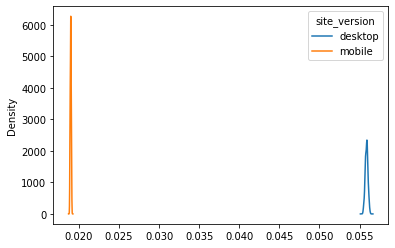

In [11]:
boot = []
for i in tqdm(range(100), leave=False):
  boot_mean = df.sample(frac=1, replace=True).groupby('site_version').target.mean()
  boot.append(boot_mean)

boot = pd.DataFrame(boot)

boot.plot.kde()